### Mining Process problem:
 This dataset is about a flotation plant which is a process used to concentrate the iron ore. This process is very common in a mining plant.

----------------------------------------------------------------------------

### Goal of this dataset:
 The target is to predict the percentage of Silica at the end of the process, which is the concentrate of iron ore and its impurity.

-------------------------------------------------------------------------

### Why prediction is needed:
 Although the percentage of Silica is measured, it's a lab measurement, which means that it takes at least one hour for the process engineers to have this value. So if it is possible to predict the amount of impurity in the process, we will save time and effort on ourselves as lab workers

=========================================================================================================================

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(rc = {"figure.figsize" : [20,20]} , font_scale = 1.1)

### Reading Data

In [3]:
df = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv")
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


### columns meaning:
 1. **date**: time and date range from the march of 2017 until September 2017.
 2. **% Iron Feed**: percentage of Iron that comes from the iron ore that is being fed into the flotation cells
 3. **% Silica Feed**: percentage of silica (impurity) that comes from the iron ore that is being fed into the flotation cells
 4. **Starch Flow**: Starch (reagent) Flow measured in m3/h
 5. **Amina Flow**: Amina (reagent) Flow measured in m3/h
 6. **Ore Pulp Flow**: t/h
 7. **Ore Pulp pH**: pH scale from 0 to 14
 8. **Ore Pulp Density**: Density scale from 1 to 3 kg/cm³
 9. **Air Flow Flotation Columns**: process data (Airflow that goes into the flotation cell measured in Nm³/h)
 10. **Flotation Columns Levels**: process data (Froth level in the flotation cell measured in mm)
 11. **% Iron Concentrate**: percentage of Iron which represents how much iron is presented at the end of the flotation process (0-100%, lab measurement)
 12. **% sillica Concentrate**: percentage of silica which represents how much iron is presented at the end of the flotation process (0-100%, lab measurement)

-----------------------

## (1) DATA ANALYSIS

**Handling with first column(date)**

In [4]:
from datetime import datetime

In [5]:
df["date"] = pd.to_datetime(df["date"] , format = "%Y-%m-%d %H:%M") 

In [6]:
df["Month_Name"] = df["date"].dt.month_name()

In [7]:
df["Day_Name"] = df["date"].dt.day_name()

In [8]:
df["Hour"] = df["date"].dt.hour

In [9]:
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Month_Name,Day_Name,Hour
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"424,954","443,558","502,255","446,37","523,344","66,91","1,31",March,Friday,1
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"432,939","448,086","496,363","445,922","498,075","66,91","1,31",March,Friday,1
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"434,61","449,688","484,411","447,826","458,567","66,91","1,31",March,Friday,1
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"442,865","446,21","471,411","437,69","427,669","66,91","1,31",March,Friday,1
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"450,523","453,67","462,598","443,682","425,679","66,91","1,31",March,Friday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"872,008","418,725","497,548","446,357","416,892","64,27","1,71",September,Saturday,23
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"864,409","418,377","506,398","372,995","426,337","64,27","1,71",September,Saturday,23
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"867,598","419,531","503,414","336,035","433,13","64,27","1,71",September,Saturday,23
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"876,591","407,299","502,301","340,844","433,966","64,27","1,71",September,Saturday,23


In [10]:
df.rename(columns = {"% Iron Feed": "iron feed percentage" , "% Silica Feed":"Silica Feed percentage"}, inplace=True)
df

,date,iron feed percentage,Silica Feed percentage,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Month_Name,Day_Name,Hour
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"424,954","443,558","502,255","446,37","523,344","66,91","1,31",March,Friday,1
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"432,939","448,086","496,363","445,922","498,075","66,91","1,31",March,Friday,1
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"434,61","449,688","484,411","447,826","458,567","66,91","1,31",March,Friday,1
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"442,865","446,21","471,411","437,69","427,669","66,91","1,31",March,Friday,1
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"450,523","453,67","462,598","443,682","425,679","66,91","1,31",March,Friday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"872,008","418,725","497,548","446,357","416,892","64,27","1,71",September,Saturday,23
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"864,409","418,377","506,398","372,995","426,337","64,27","1,71",September,Saturday,23
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"867,598","419,531","503,414","336,035","433,13","64,27","1,71",September,Saturday,23
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"876,591","407,299","502,301","340,844","433,966","64,27","1,71",September,Saturday,23


**drop the date column after applying feature engineering to it**

In [11]:
df.drop(columns="date" , inplace=True)

In [12]:
columns = ['iron feed percentage', 'Silica Feed percentage', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate']
columns

['iron feed percentage',
 'Silica Feed percentage',
 'Starch Flow',
 'Amina Flow',
 'Ore Pulp Flow',
 'Ore Pulp pH',
 'Ore Pulp Density',
 'Flotation Column 01 Air Flow',
 'Flotation Column 02 Air Flow',
 'Flotation Column 03 Air Flow',
 'Flotation Column 04 Air Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 06 Air Flow',
 'Flotation Column 07 Air Flow',
 'Flotation Column 01 Level',
 'Flotation Column 02 Level',
 'Flotation Column 03 Level',
 'Flotation Column 04 Level',
 'Flotation Column 05 Level',
 'Flotation Column 06 Level',
 'Flotation Column 07 Level',
 '% Iron Concentrate',
 '% Silica Concentrate']

**- we found here the comma(,) instead(.) as a floating mark and this considers the numerical columns as an object, so we convert all columns from object to be numeric.**

**- check if there any string words between raws in numerical columns.**

In [13]:
for column in columns:
    df[column] = df[column].str.replace(',','.')
    df[column] = pd.to_numeric(df[column] , errors="coerce")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   iron feed percentage          737453 non-null  float64
 1   Silica Feed percentage        737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation Column 06 Air Flow  737453 non-nul

In [15]:
df.describe()

,iron feed percentage,Silica Feed percentage,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Hour
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763,11.507301
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554,6.924463
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000,0.000000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000,5.000000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000,12.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000,18.000000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000,23.000000


In [16]:
df.corr()

,iron feed percentage,Silica Feed percentage,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,Hour
iron feed percentage,1.000000,-0.971833,0.027981,-0.088148,0.160705,0.007451,-0.125518,-0.062379,-0.169430,-0.062207,...,0.029499,0.020839,0.015191,0.016108,0.023288,0.003694,0.025723,0.055424,-0.077052,0.013681
Silica Feed percentage,-0.971833,1.000000,-0.016073,0.078735,-0.150788,0.008014,0.104497,0.091757,0.182573,0.084197,...,-0.038291,-0.036968,-0.022675,-0.034050,-0.043753,-0.019502,-0.046413,-0.044168,0.072724,-0.026363
Starch Flow,0.027981,-0.016073,1.000000,0.254748,0.042703,0.263020,0.226004,0.191131,0.186585,0.183288,...,-0.294380,-0.278422,-0.301757,-0.012612,-0.055528,-0.071722,-0.038193,0.069657,-0.066394,-0.010956
Amina Flow,-0.088148,0.078735,0.254748,1.000000,0.212252,0.123690,0.655788,0.111321,0.122911,0.101957,...,-0.268536,-0.234454,-0.286968,-0.180301,-0.211712,-0.197758,-0.168050,-0.110148,0.156701,-0.013181
Ore Pulp Flow,0.160705,-0.150788,0.042703,0.212252,1.000000,0.118376,0.012279,-0.137866,-0.118549,-0.140761,...,-0.008579,-0.008049,-0.054351,-0.009784,0.002260,-0.016661,0.016585,0.083120,0.008222,-0.013359
Ore Pulp pH,0.007451,0.008014,0.263020,0.123690,0.118376,1.000000,0.115189,0.163073,0.144935,0.193372,...,-0.165739,-0.153557,-0.140070,0.046371,0.013041,-0.075034,0.019021,0.192992,-0.147739,-0.010007
Ore Pulp Density,-0.125518,0.104497,0.226004,0.655788,0.012279,0.115189,1.000000,-0.005142,0.025794,-0.031673,...,-0.111608,-0.093024,-0.149584,-0.087761,-0.140881,-0.099817,-0.086067,0.015580,0.046984,-0.046118
Flotation Column 01 Air Flow,-0.062379,0.091757,0.191131,0.111321,-0.137866,0.163073,-0.005142,1.000000,0.848277,0.954528,...,-0.441573,-0.425758,-0.371791,-0.061940,-0.091386,-0.118992,-0.110726,0.098599,-0.219158,-0.005247
Flotation Column 02 Air Flow,-0.169430,0.182573,0.186585,0.122911,-0.118549,0.144935,0.025794,0.848277,1.000000,0.860438,...,-0.432033,-0.422855,-0.365535,-0.074312,-0.110512,-0.117619,-0.112403,0.058744,-0.167398,-0.011964
Flotation Column 03 Air Flow,-0.062207,0.084197,0.183288,0.101957,-0.140761,0.193372,-0.031673,0.954528,0.860438,1.000000,...,-0.440823,-0.420932,-0.364773,-0.046685,-0.063693,-0.100419,-0.085294,0.100136,-0.218891,-0.010114


- **correlation between most columns is weak**

In [17]:
df.corr()["% Silica Concentrate"]

iron feed percentage           -0.077052
Silica Feed percentage          0.072724
Starch Flow                    -0.066394
Amina Flow                      0.156701
Ore Pulp Flow                   0.008222
Ore Pulp pH                    -0.147739
Ore Pulp Density                0.046984
Flotation Column 01 Air Flow   -0.219158
Flotation Column 02 Air Flow   -0.167398
Flotation Column 03 Air Flow   -0.218891
Flotation Column 04 Air Flow   -0.005011
Flotation Column 05 Air Flow   -0.009293
Flotation Column 06 Air Flow   -0.049650
Flotation Column 07 Air Flow   -0.071776
Flotation Column 01 Level       0.017217
Flotation Column 02 Level       0.030955
Flotation Column 03 Level       0.014246
Flotation Column 04 Level      -0.149456
Flotation Column 05 Level      -0.169170
Flotation Column 06 Level      -0.102443
Flotation Column 07 Level      -0.141387
% Iron Concentrate             -0.800560
% Silica Concentrate            1.000000
Hour                           -0.003713
Name: % Silica C

In [18]:
df["iron feed percentage"].value_counts()

64.03    142560
57.46     45900
48.81     34560
52.61     14580
55.17     12960
          ...  
49.68      1080
52.25      1080
55.19      1080
55.20      1074
57.45       900
Name: iron feed percentage, Length: 278, dtype: int64

**Most frequent iron feed percentage is 64.03%**

**least frequent iron feed percentage is 57.45%**

In [19]:
df["Silica Feed percentage"].value_counts()

6.26     142560
10.80     45900
25.31     34560
20.24     14580
14.35     12960
          ...  
2.77       1080
10.58      1080
16.98      1074
12.95       900
9.34        720
Name: Silica Feed percentage, Length: 293, dtype: int64

**Most frequent Silica Feed percentage is 6.26%**

**least frequent Silica Feed percentage is 9.34%**

In [20]:
df["% Iron Concentrate"].value_counts()

65.440000    16920
65.260000     8460
64.030000     7741
65.280000     6120
64.730000     5580
             ...  
64.245261        1
63.791884        1
62.356801        1
63.781524        1
63.232691        1
Name: % Iron Concentrate, Length: 38696, dtype: int64

**Most frequent Iron Concentrate percentage is 65.44%**

In [21]:
df["% Silica Concentrate"].value_counts()

2.080000    17100
1.190000    10080
3.110000     8460
1.340000     6840
1.680000     6300
            ...  
2.886676        1
4.925039        1
3.462767        1
5.468392        1
4.810884        1
Name: % Silica Concentrate, Length: 55569, dtype: int64

**Most frequent Silica Concentrate percentage is 2.08% then 1.19%**

In [22]:
df["Month_Name"].value_counts()

May          133920
August       133920
July         133920
June         129600
April        129599
September     38880
March         37614
Name: Month_Name, dtype: int64

## (2) DATA VISUALIZATION

C:\Users\alaae\anaconda3\lib\site-packages\seaborn\axisgrid.py:1559: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


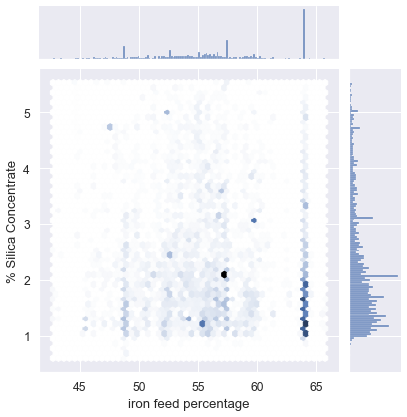

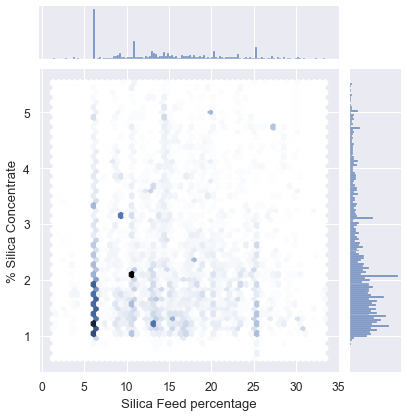

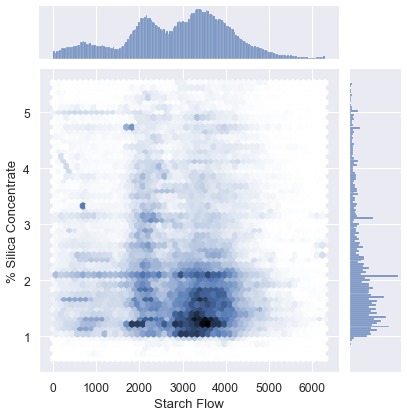

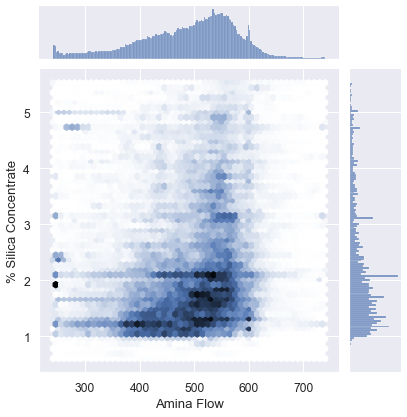

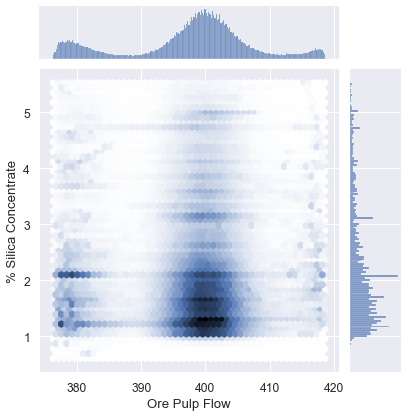

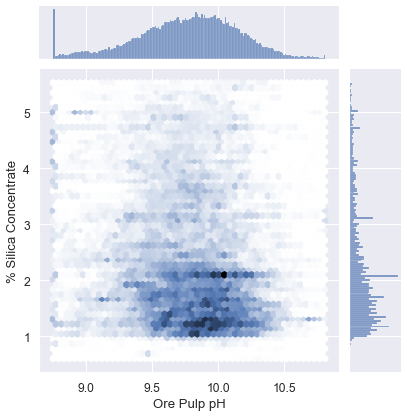

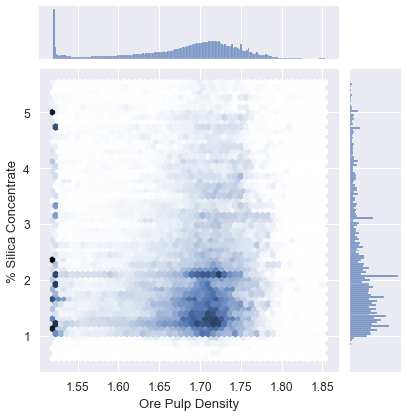

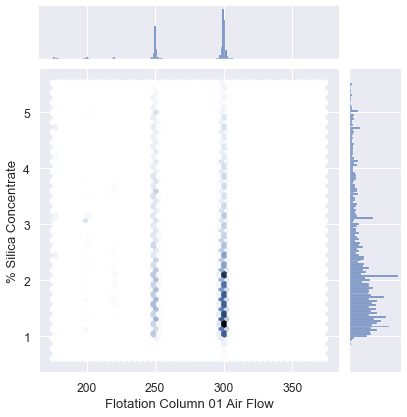

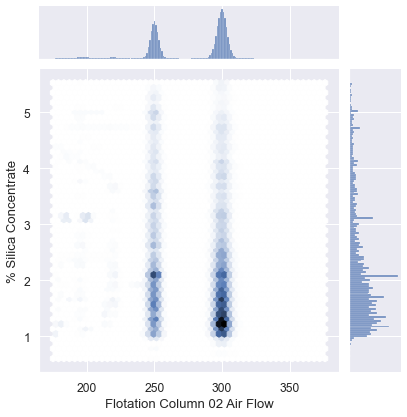

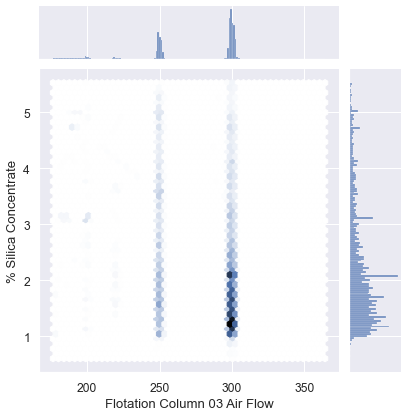

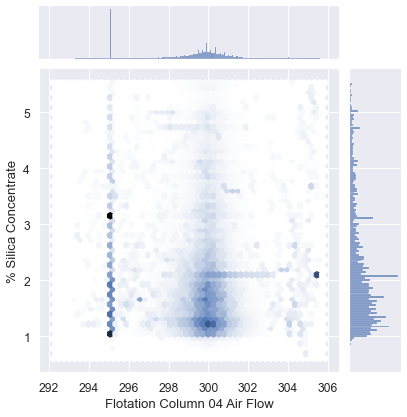

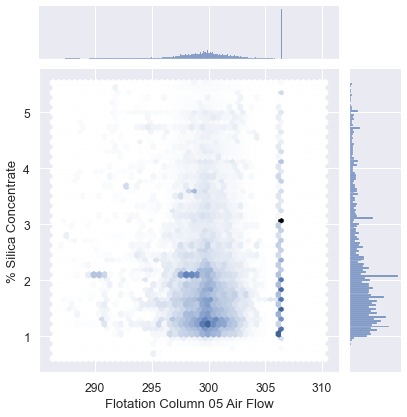

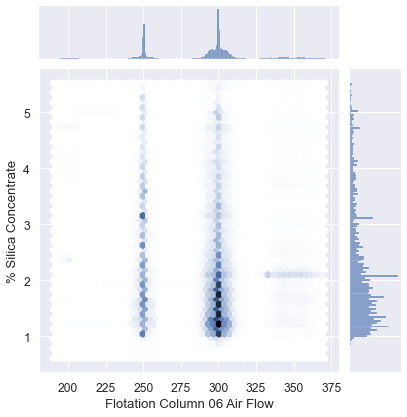

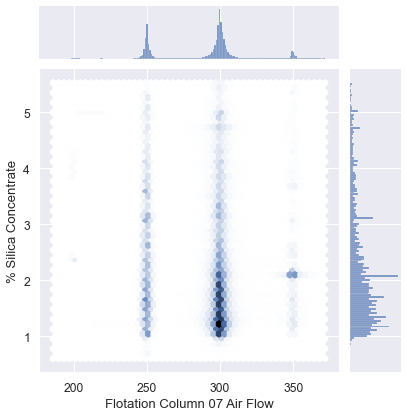

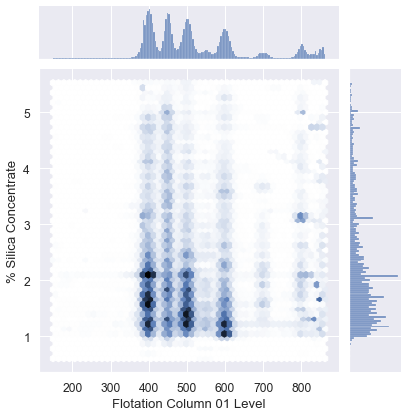

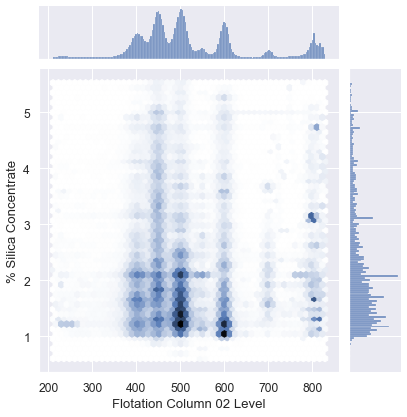

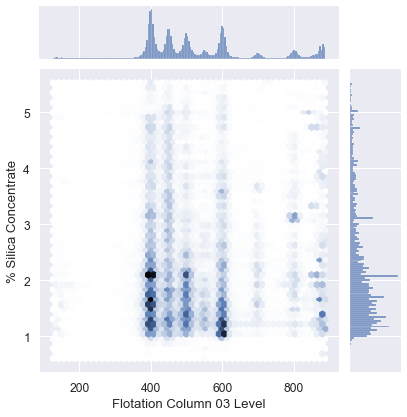

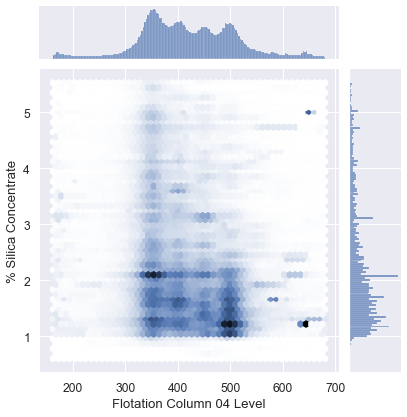

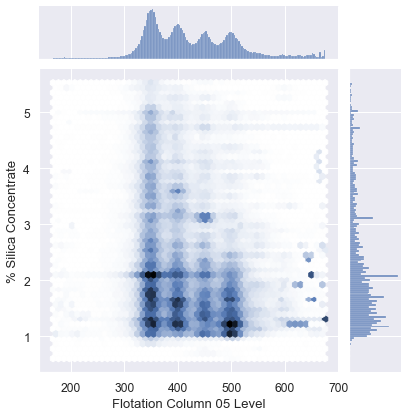

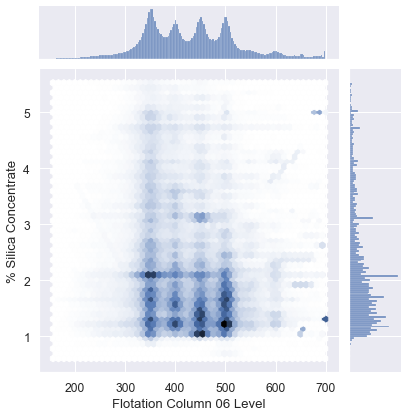

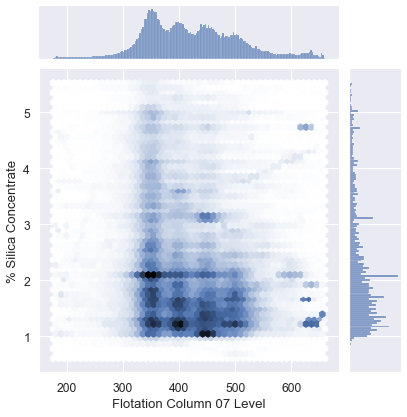

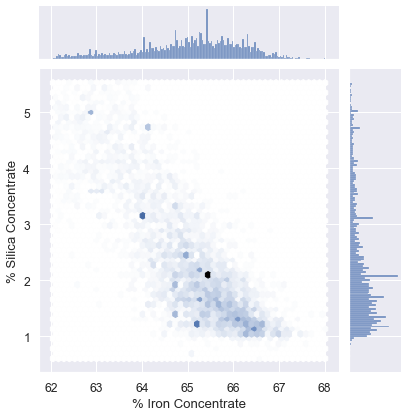

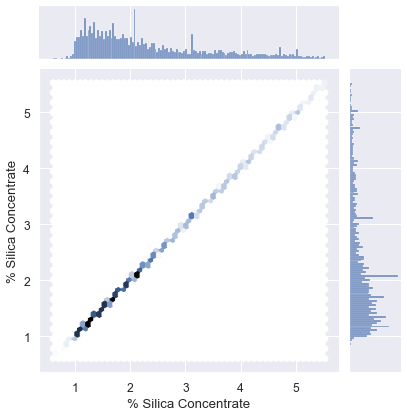

In [24]:
for column in columns:
    sns.jointplot(data = df , y = "% Silica Concentrate" , x = df[column] , kind="hex")

<ipython-input-25-7e7e820e940f>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,8))


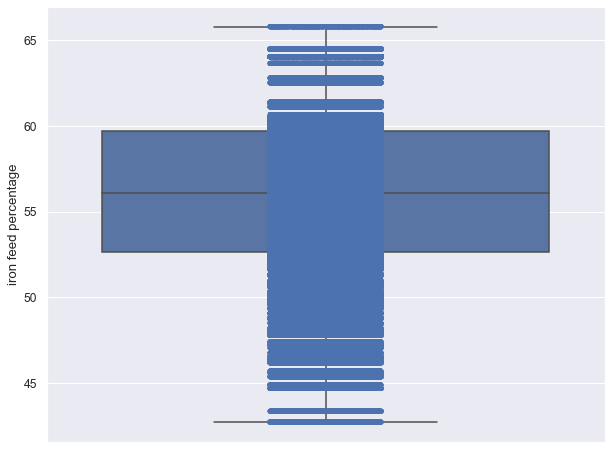

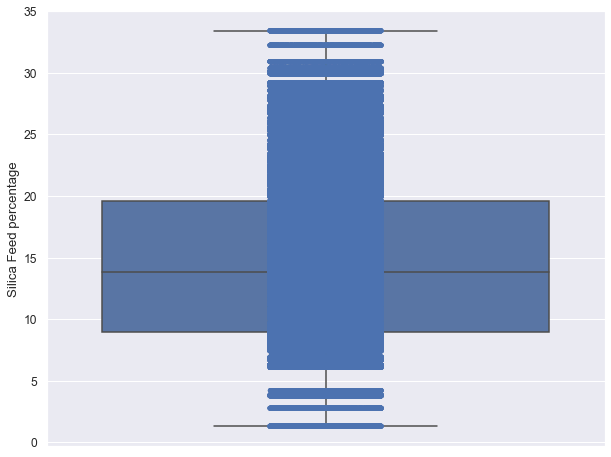

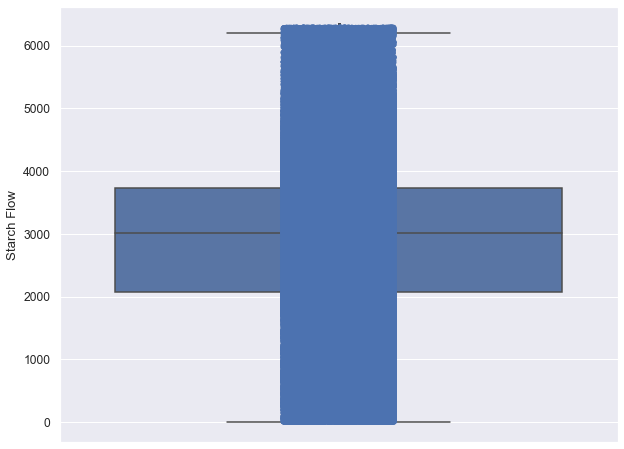

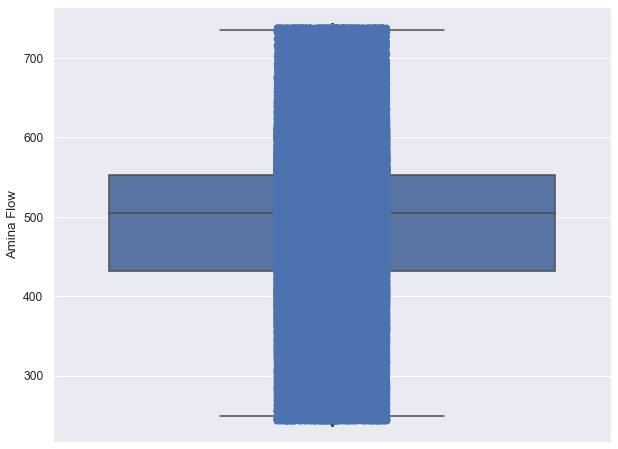

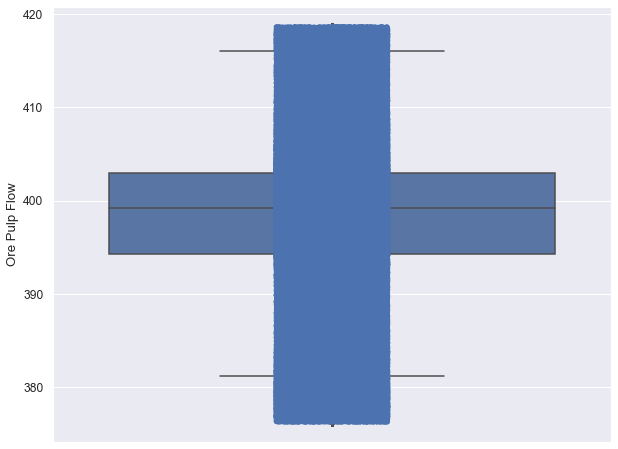

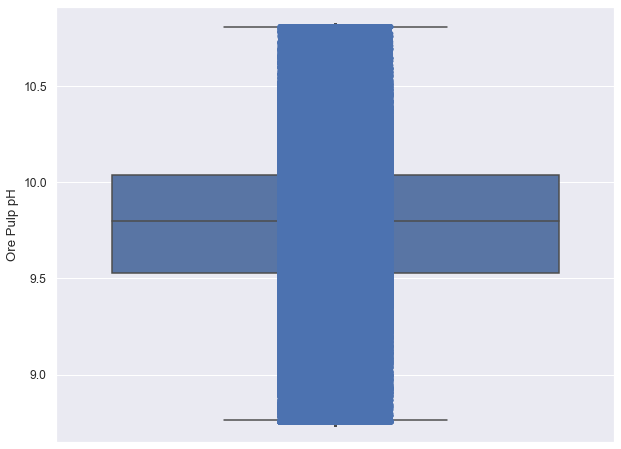

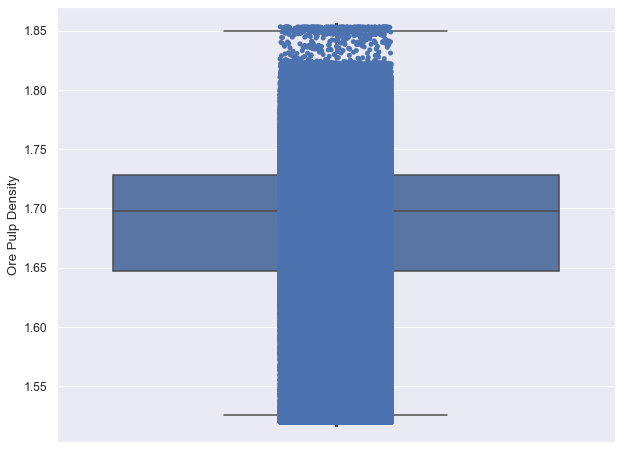

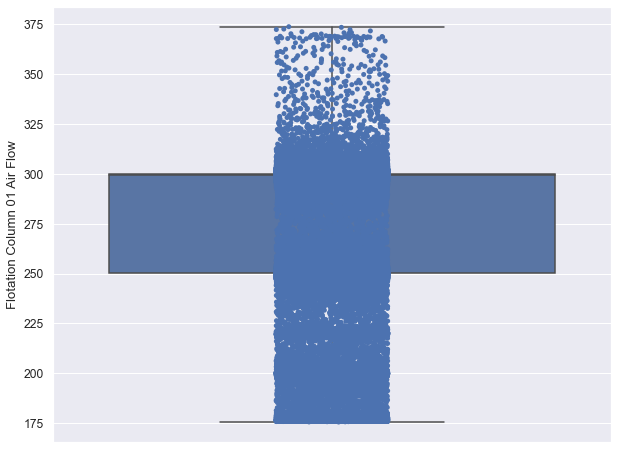

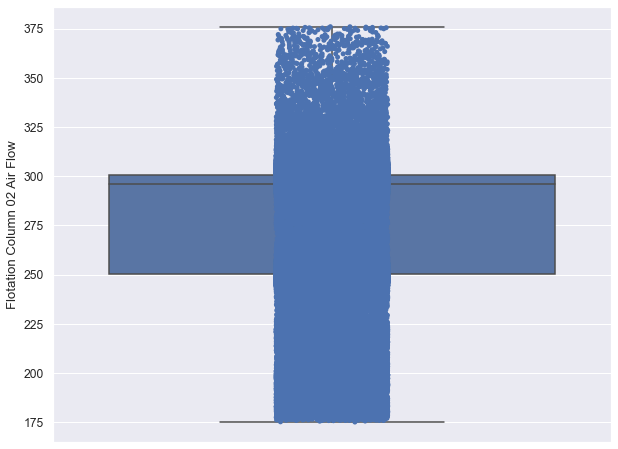

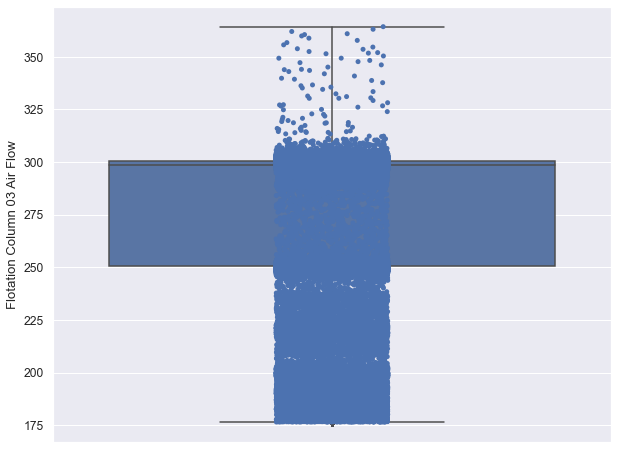

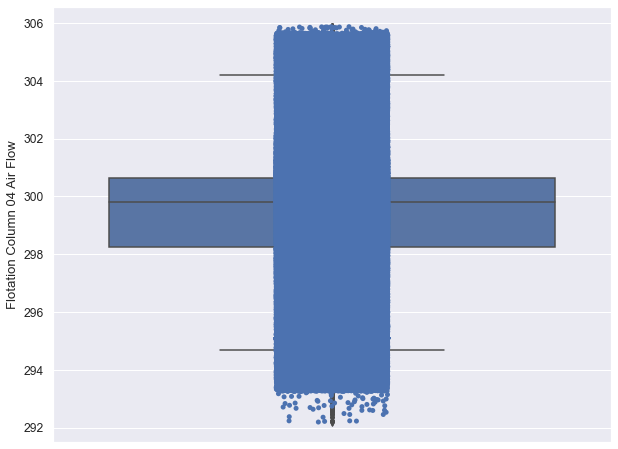

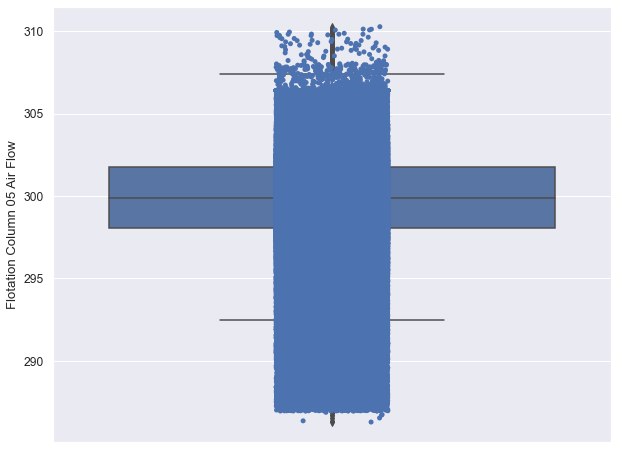

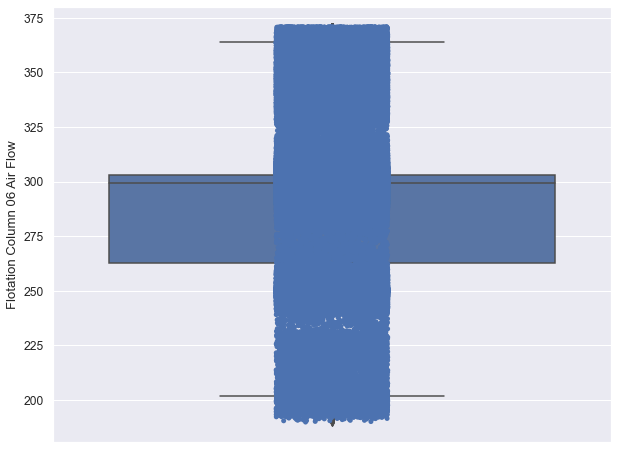

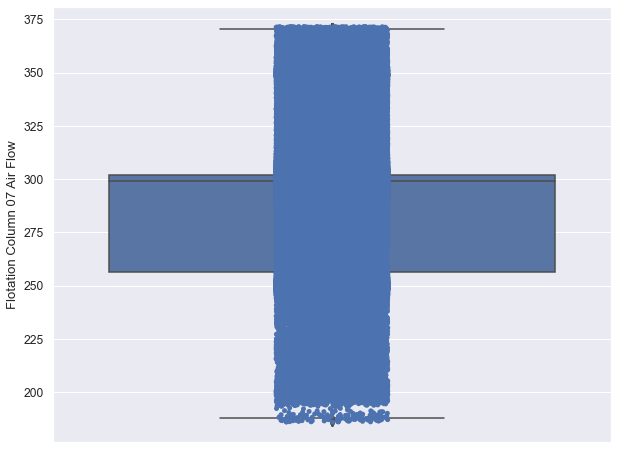

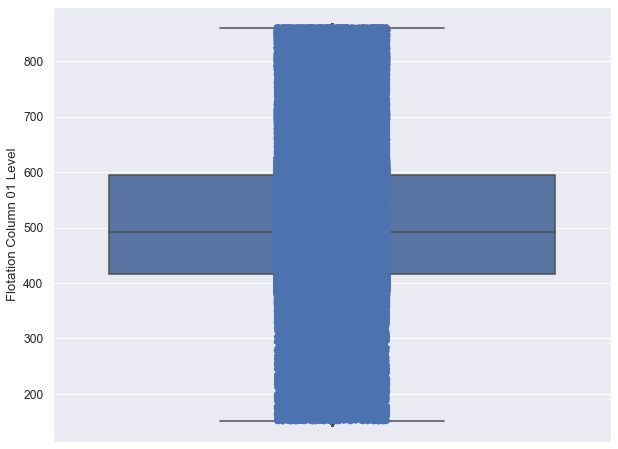

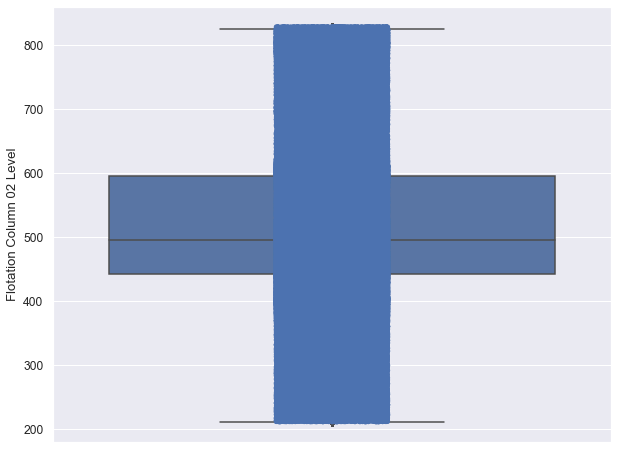

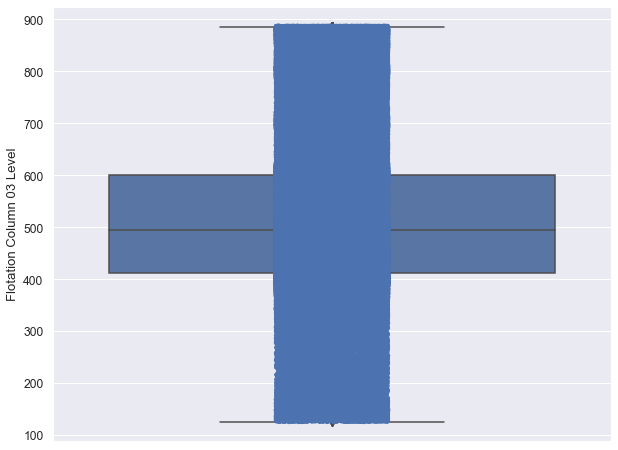

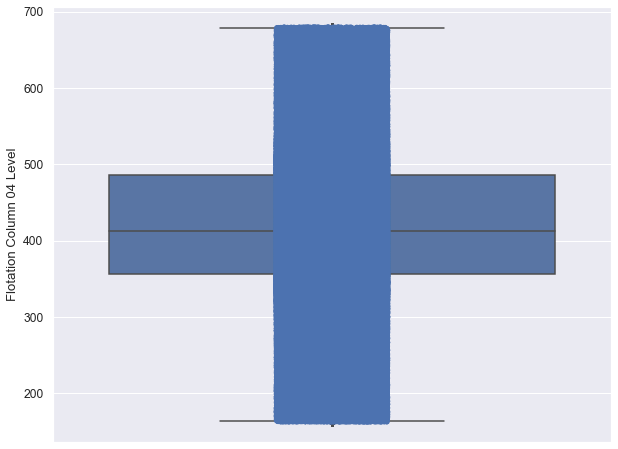

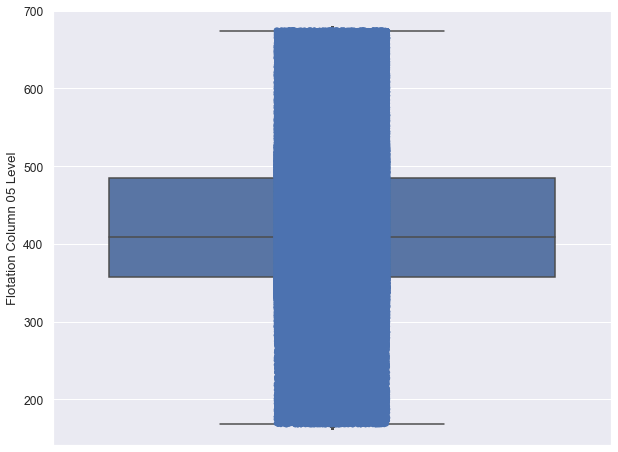

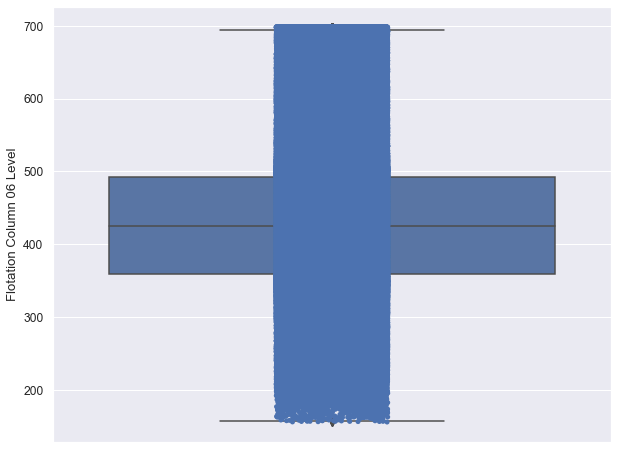

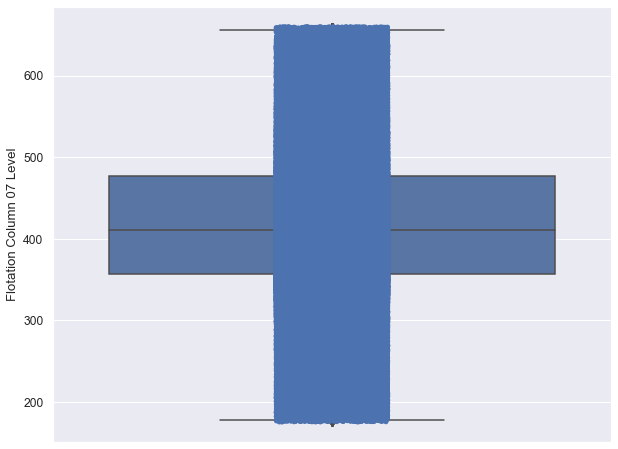

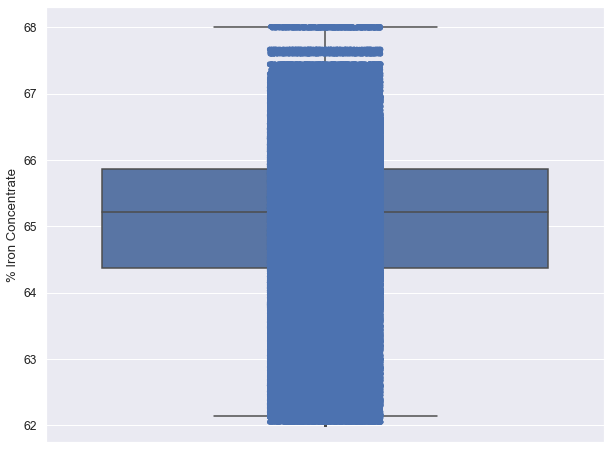

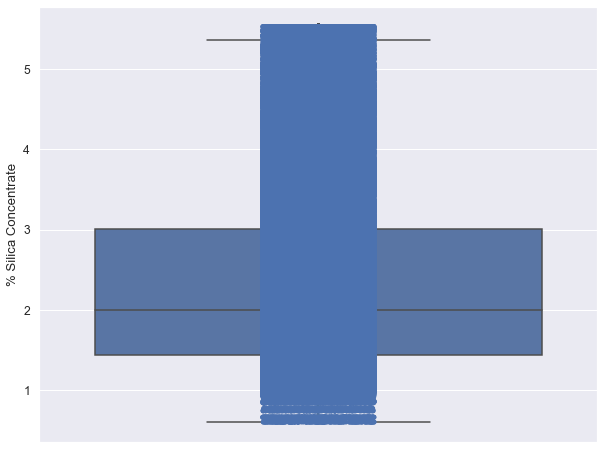

In [25]:
for column in columns:
    fig = plt.figure(figsize=(10,8))
    sns.boxplot(data = df , y = df[column])
    sns.stripplot(data = df , y = df[column])

<Figure size 720x576 with 0 Axes>

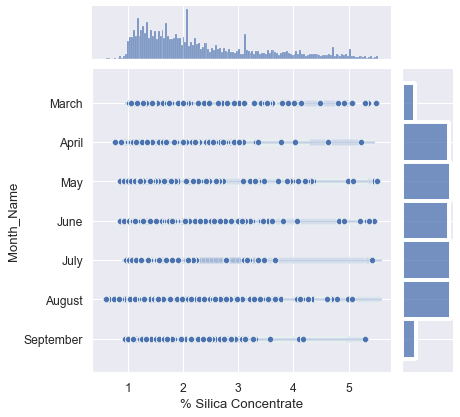

In [26]:
fig = plt.figure(figsize=(10,8))
sns.jointplot(data = df , y = "Month_Name" , x = "% Silica Concentrate")

<Figure size 720x576 with 0 Axes>

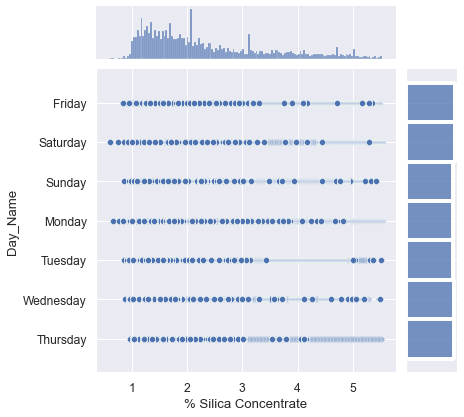

In [27]:
fig = plt.figure(figsize=(10,8))
sns.jointplot(data = df , y = "Day_Name" , x = "% Silica Concentrate")

<Figure size 720x576 with 0 Axes>

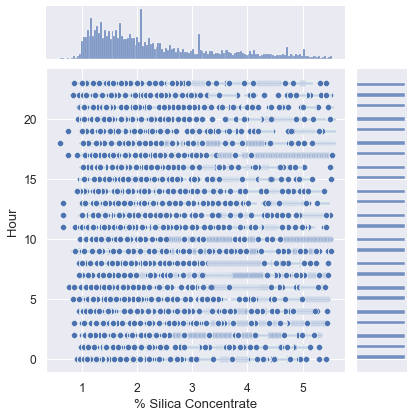

In [28]:
fig = plt.figure(figsize=(10,8))
sns.jointplot(data = df , y = "Hour" , x = "% Silica Concentrate")

**there are no outliers detected**

## (3) DATA PREPROCESSING 

**Work with Nominal Features with pandas get_dummies method**

In [23]:
df.columns

Index(['iron feed percentage', 'Silica Feed percentage', 'Starch Flow',
       'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate', 'Month_Name', 'Day_Name',
       'Hour'],
      dtype='object')

In [24]:
df = pd.get_dummies(df , columns=["Month_Name"])

In [25]:
df = pd.get_dummies(df , columns=["Day_Name" , "Hour"] , drop_first=True)
df

,iron feed percentage,Silica Feed percentage,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,0,0,0,0,0,0,0,0,0,0
1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,0,0,0,0,0,0,0,0,0,0
2,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,0,0,0,0,0,0,0,0,0,0
3,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,0,0,0,0,0,0,0,0,0,0
4,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,0,0,0,0,0,0,0,0,0,1
737449,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,0,0,0,0,0,0,0,0,0,1
737450,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,0,0,0,0,0,0,0,0,0,1
737451,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,...,0,0,0,0,0,0,0,0,0,1


In [26]:
df.columns

Index(['iron feed percentage', 'Silica Feed percentage', 'Starch Flow',
       'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate', 'Month_Name_April',
       'Month_Name_August', 'Month_Name_July', 'Month_Name_June',
       'Month_Name_March', 'Month_Name_May', 'Month_Name_September',
       'Day_Name_Monday', 'Day_Name_Saturday', 'Day_Name_Sunday',
       'Day_Name_Thursday', 'Day_Name_Tuesday', 'Day_Name_Wednesday', 'Hour_1',
       'Hour_2', 'Hour_3'

In [27]:
data = 0

In [28]:
df.insert(29,"Month_Name_January", data)

In [29]:
df.insert(30,"Month_Name_February", data)

In [30]:
df.insert(31,"Month_Name_November", data)

In [31]:
df.insert(32,"Month_Name_October", data)

In [32]:
df

,iron feed percentage,Silica Feed percentage,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,0,0,0,0,0,0,0,0,0,0
1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,0,0,0,0,0,0,0,0,0,0
2,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,0,0,0,0,0,0,0,0,0,0
3,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,0,0,0,0,0,0,0,0,0,0
4,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,0,0,0,0,0,0,0,0,0,1
737449,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,0,0,0,0,0,0,0,0,0,1
737450,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,0,0,0,0,0,0,0,0,0,1
737451,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,...,0,0,0,0,0,0,0,0,0,1


In [33]:
df.columns

Index(['iron feed percentage', 'Silica Feed percentage', 'Starch Flow',
       'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate', 'Month_Name_April',
       'Month_Name_August', 'Month_Name_July', 'Month_Name_June',
       'Month_Name_March', 'Month_Name_May', 'Month_Name_January',
       'Month_Name_February', 'Month_Name_November', 'Month_Name_October',
       'Month_Name_September', 'Day_Name_Monday', 'Day_Name_Saturday',
       'Day_Name_Sunday', '

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 63 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   iron feed percentage          737453 non-null  float64
 1   Silica Feed percentage        737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation Column 06 Air Flow  737453 non-nul

**detect if there missing values or not**

In [35]:
df.isna().sum()

iron feed percentage      0
Silica Feed percentage    0
Starch Flow               0
Amina Flow                0
Ore Pulp Flow             0
                         ..
Hour_19                   0
Hour_20                   0
Hour_21                   0
Hour_22                   0
Hour_23                   0
Length: 63, dtype: int64

**We must Drop the percentage of Iron Concentrate column from our data because this column is considered as an output but the problem is  just to detect the percentage of Silica Concentrate**

In [36]:
x = df.drop(columns=["% Silica Concentrate" , "% Iron Concentrate"])
x

,iron feed percentage,Silica Feed percentage,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,0,0,0,0,0,0,0,0,0,0
1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,0,0,0,0,0,0,0,0,0,0
2,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,0,0,0,0,0,0,0,0,0,0
3,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,0,0,0,0,0,0,0,0,0,0
4,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,0,0,0,0,0,0,0,0,0,1
737449,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,0,0,0,0,0,0,0,0,0,1
737450,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,0,0,0,0,0,0,0,0,0,1
737451,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,...,0,0,0,0,0,0,0,0,0,1


In [37]:
y = df["% Silica Concentrate"]
y

0         1.31
1         1.31
2         1.31
3         1.31
4         1.31
          ... 
737448    1.71
737449    1.71
737450    1.71
737451    1.71
737452    1.71
Name: % Silica Concentrate, Length: 737453, dtype: float64

**Spliting data**

In [38]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.05 , random_state = True)

In [39]:
df.shape

(737453, 63)

In [40]:
x_train.shape

(700580, 61)

In [41]:
x_test.shape

(36873, 61)

In [42]:
y_train.shape

(700580,)

In [43]:
y_test.shape

(36873,)

**Scaling**

In [44]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x_train)
x_train = scale.transform(x_train)
x_test =scale.transform(x_test)

In [45]:
x_train

array([[-0.42489486,  0.0991095 , -1.46082168, ..., -0.20884278,
        -0.20868269, -0.20868641],
       [-1.28175195,  1.37825054, -0.04445838, ..., -0.20884278,
        -0.20868269, -0.20868641],
       [-2.24717012,  2.27408984,  0.15626522, ..., -0.20884278,
        -0.20868269, -0.20868641],
       ...,
       [-0.09533444,  0.11820116,  0.70795887, ..., -0.20884278,
        -0.20868269, -0.20868641],
       [ 0.09270886, -0.04187505,  0.53472861, ..., -0.20884278,
        -0.20868269, -0.20868641],
       [-0.21746566, -0.04481222, -0.70117971, ..., -0.20884278,
         4.79196436, -0.20868641]])

In [46]:
x_test

array([[-0.39387741,  0.42366767, -0.50985371, ..., -0.20884278,
        -0.20868269, -0.20868641],
       [-0.37061432,  0.40457602, -0.39830037, ...,  4.7882909 ,
        -0.20868269, -0.20868641],
       [ 0.06944577,  0.02568005, -0.12016587, ..., -0.20884278,
        -0.20868269, -0.20868641],
       ...,
       [-0.88821804,  0.84955849, -1.83240349, ..., -0.20884278,
        -0.20868269, -0.20868641],
       [ 1.50012571, -1.23290074, -2.17274586, ..., -0.20884278,
        -0.20868269, -0.20868641],
       [-0.26011465,  0.40310743,  2.09380916, ..., -0.20884278,
        -0.20868269, -0.20868641]])

## (4) MACHINE LEARNING MODEL 

**first predict % silica Concentrate**

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [48]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
print("By Using Random Forest Model:-")
print(f'Training Score: {model.score(x_train, y_train)}')
print(f'Test Score: {model.score(x_test, y_test)}') 
y_pred = model.predict(x_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

By Using Random Forest Model:-
Training Score: 0.9993606518241301
Test Score: 0.9956191576816305
RMSE: 0.07482149776201914


In [49]:
y_pred[:100]

array([2.61      , 1.11756946, 4.2768    , 2.07      , 1.63783036,
       1.8872    , 2.642     , 2.24      , 5.0031    , 2.52      ,
       2.0736    , 1.19      , 1.7803    , 2.76      , 3.52      ,
       2.23      , 1.21      , 1.0201    , 1.7822    , 4.8804    ,
       2.87      , 2.0034    , 2.7611    , 1.32      , 1.8971    ,
       1.3       , 5.03      , 2.92      , 1.28      , 1.09      ,
       2.83      , 3.39726607, 0.84      , 3.66      , 1.5336    ,
       2.07      , 1.18      , 2.41      , 1.        , 1.12      ,
       1.7164    , 1.97      , 0.66      , 2.43      , 1.38257758,
       1.44      , 1.924     , 2.46      , 2.08      , 1.25      ,
       4.0155    , 4.26570985, 1.39      , 4.16      , 1.87      ,
       1.57      , 1.3518    , 1.7679    , 5.03      , 1.19      ,
       4.73      , 4.24      , 4.0243    , 1.1301    , 1.057     ,
       1.48282931, 2.2483    , 1.21      , 4.3       , 3.73026976,
       2.81      , 1.4745    , 1.3313    , 1.83      , 4.19881

In [50]:
np.array(y_test[:100])

array([2.61      , 1.11783454, 4.29      , 2.07      , 1.62      ,
       1.91      , 2.65      , 2.24      , 5.03      , 2.52      ,
       2.08      , 1.19      , 1.76      , 2.76      , 3.52      ,
       2.23      , 1.21      , 1.02      , 1.78      , 5.03      ,
       2.87      , 1.99      , 2.84      , 1.32      , 1.72      ,
       1.3       , 5.03      , 2.92      , 1.28      , 1.09      ,
       2.83      , 3.39727273, 0.84      , 3.66      , 1.53      ,
       2.07      , 1.18      , 2.41      , 1.        , 1.12      ,
       1.65      , 1.97      , 0.66      , 2.52      , 1.31      ,
       1.44      , 1.93      , 2.46      , 2.08      , 1.25      ,
       4.03      , 4.26560584, 1.39      , 4.16      , 1.87      ,
       1.57      , 1.33      , 1.77      , 5.03      , 1.19      ,
       4.73      , 4.24      , 4.09      , 1.13      , 1.04      ,
       1.37      , 2.25      , 1.21      , 4.3       , 3.88534626,
       2.81      , 1.46      , 1.34      , 1.83      , 4.19655

In [51]:
x.columns

Index(['iron feed percentage', 'Silica Feed percentage', 'Starch Flow',
       'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       'Month_Name_April', 'Month_Name_August', 'Month_Name_July',
       'Month_Name_June', 'Month_Name_March', 'Month_Name_May',
       'Month_Name_January', 'Month_Name_February', 'Month_Name_November',
       'Month_Name_October', 'Month_Name_September', 'Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_N

In [52]:
new_data = [56.03985 , 2.98 , 983.233 , 240.833 , 401.89754 , 9.098 , 1.8997 , 209.56478 , 195.139 , 318.908 , 270.928 , 369.0948 , 256.46972 , 293.738 , 473.2352541 , 395.6 , 298.684 , 330.9 , 424.65 , 280.456 , 501.563178 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0]

In [53]:
new_data = scale.transform([new_data]) # Apply Scaling on new data

In [54]:
model.predict(new_data)[0] # predect pecentage of silica for the new data

2.527502894172999

**Saving Model, Scaling, and Columns Names For Deployment  :)**

In [55]:
import joblib

In [56]:
joblib.dump(model, 'model.h5')

['model.h5']

In [57]:
joblib.dump(scale, 'scaling.h5')

['scaling.h5']

In [58]:
joblib.dump(x.columns, 'columns.h5')

['columns.h5']